4.1 선형 회귀

4.1.1 정규방정식

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [4]:
np.random.seed(42)

In [5]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# random.rand: 0~1에서의 균일분포(표준정규분포)를 가진 난수 matrix 생성
# random.randn: 평균 0, 표준편차 1인 (표준정규분포)를 가진 난수 matrix 생성

In [6]:
X_b = np.c_[np.ones((100,1)), X] # 모든 sample에 x0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.21509616],
       [9.75532293]])

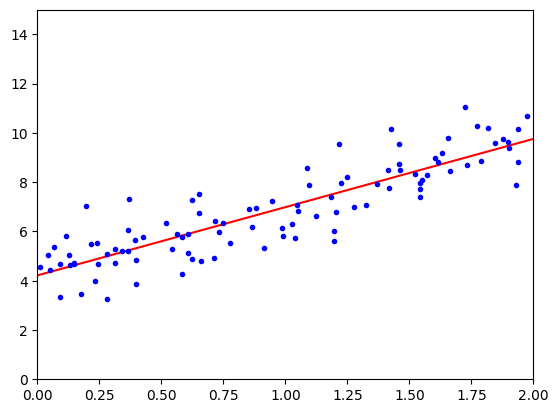

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [10]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

4.2 경사 하강법

4.2.1 배치 경사 하강법

In [15]:
#파라미터에 따른 비용 함수의 변화를 계산(매 step마다 전체 훈련 세트에 대하여 계산) >> 데이터셋이 큰 경우에 느려짐 but 특성 수가 많아도 큰 영향이 없음

In [16]:
eta = 0.1
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

4.2.2 확률적 경사 하강법(SGD)

In [18]:
#배치 경사 하강법과 다르게 무작위로 하나의 sample을 골라서 경사 하강법을 사용 >> 매우 빠르게 수렴하는 특징이 있지만 불안정하게 요동치기 때문에 정확한 최솟값에 도달 X
#학습 스케줄: 매 반복에서 학습률을 결정하는 함수(초반에 학습률을 크게 설정해서 빠르게 최솟값 쪽으로 접근한 다음 학습률을 낮춰서 전역 최솟값으로 접근시킴)

In [19]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 파라미터

def learning_schedule(t):
    return t0 / (t+ t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [20]:
theta

array([[4.18475289],
       [2.73036719]])

In [21]:
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21647744]), array([2.77853398]))

4.2.3 미니배치 경사 하강법

In [23]:
#미니배치: 전체 훈련 세트에서 '미니배치'라고 불리는 작은 샘플 세트를 기반으로 gradient 계산 >> 배치와 확률의 장점들을 끌어 모은 느낌?

4.3 다항 회귀

In [24]:
#비선형 데이터에도 선형 회귀를 사용 >> 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형 모델 훈련

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

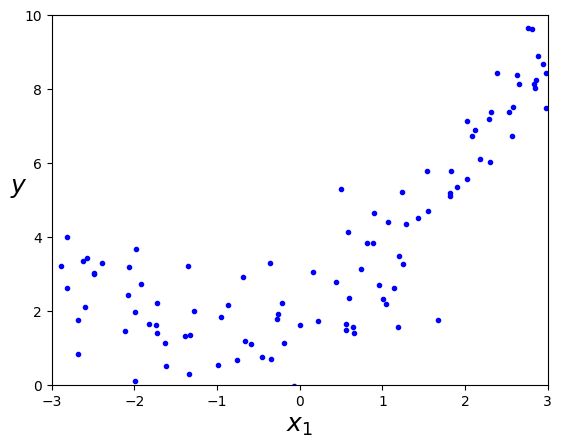

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [28]:
print(X[0])
print(X_poly[0])

[2.94407494]
[2.94407494 8.66757727]


In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

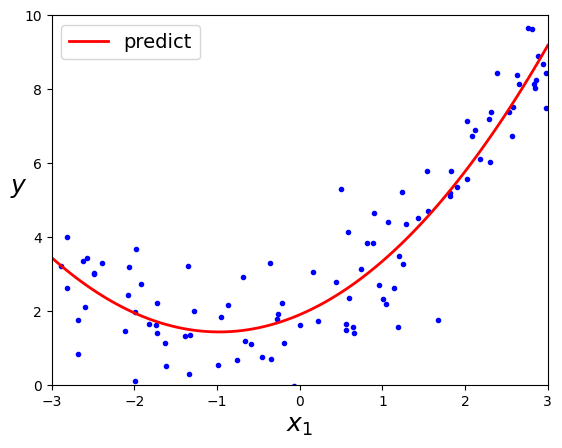

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predict")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [31]:
#실제 함수 : y = 0.5*x^2 + 1.0*x + 2 + 가우시안 잡음
#예측 함수 : y = 0.454*x^2 + 1.0*x + 2.39

4.4 학습 곡선

In [32]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증")

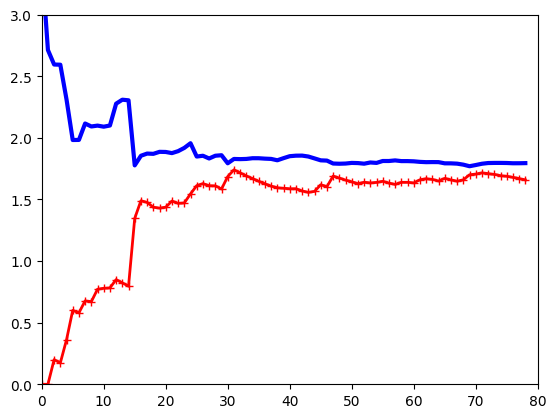

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                     
plt.show()     

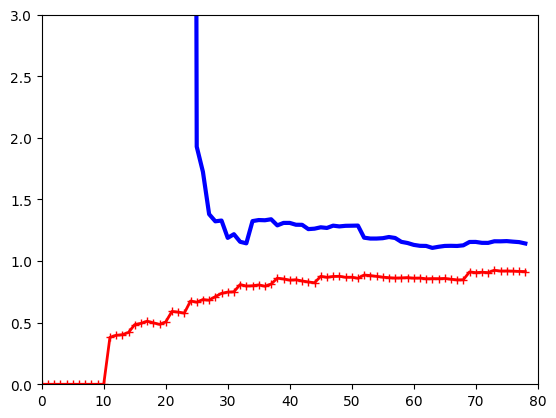

In [34]:
polynomial_regression = Pipeline([
        ("pily_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

4.5 규제가 있는 선형 모델

4.5.1 릿지 회귀

In [35]:
#규제가 추가된 선형 회귀 버전
#모델의 가중치가 가능한 작게 유지되도록 함
#규제항이 훈련하는 동안에만 추가
#알파(a) 0이면 선형 회귀/ 아주 커지면 가중치가 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨 

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.07720864]])

In [39]:
sgd_reg = SGDRegressor(max_iter=50, penalty="l2", tol=1e-3, random_state=42)
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

c:\Users\JW\Desktop\khl\venv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.06360529])

4.5.2 라쏘 회귀

In [ ]:
#덜 중요한 특성의 가중치를 제거

In [40]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.04247738])

4.5.3 엘라스틱넷

In [ ]:
#릿지 회귀와 라쏘 회귀를 절충한 모델
#혼합 비율 r을 이용하여 사용
#r=0이면 릿지 회귀, r=1이면 라쏘 회귀
#기본은 릿지 회귀를 사용, 쓰이는 특성이 몇 개 없다면 라쏘나 엘라스틱넷
#특성 몇 개가 강력하게 연관되면 엘라스틱넷

In [41]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.04191364])

4.5.4 조기종료

In [ ]:
#검증 에러가 최솟값에 도달하면 바로 훈련 중지
#모델이 과대적합되는 것을 방지

In [44]:
from sklearn.base import clone
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=42)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler",StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

c:\Users\JW\Desktop\khl\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\JW\Desktop\khl\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\JW\Desktop\khl\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\JW\Desktop\khl\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1551: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\JW\Desktop\khl\venv\lib\site-pa

In [45]:
best_epoch, best_model

(297,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))

4.6 로지스틱 회귀

4.6.1 확률 추정

In [ ]:
#회귀 모델이지만 분류의 역할 가능
#선형 회귀 모델과 같이 입력 틍성의 가중치 합을 계산(편향을 더함)
#결과값이 아닌 결과값의 로지스틱 출력
#시그모이드 함수로 출력

4.6.2 훈련과 비용 함수

In [ ]:
#양성 클래스에 대하요 높은 확률을 추정하고 음성 클래스에 대하여 낮은 확률을 추정
#비용 함수는 모든 훈련 샘플의 비용을 평균으로 계산 = 로그 손실
#비용 함수는 볼록 함수이므로 경사 하강법을 이용하여 전역 최솟값 계산 가능

4.6.3 결정 경계

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [48]:
X = iris["data"][:,3:]
y = (iris["target"] == 2)

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

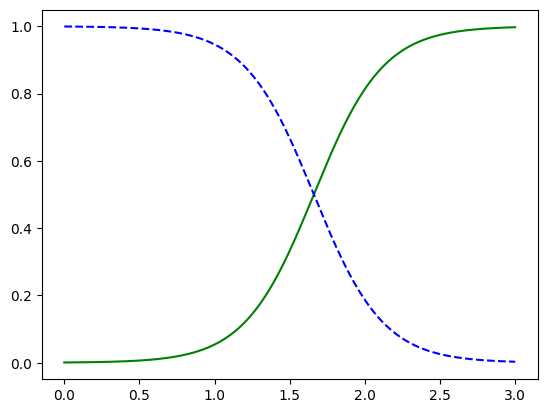

In [53]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Irist virginica")

In [54]:
log_reg.predict([[1.7],[1.5]])
#1.6cm의 꽃잎 길이에서 결정 경계 형성
#1.7은 virginica가 맞고 1.5는 virginica가 아님

array([ True, False])

4.6.4 소프트맥스 회귀

In [ ]:
#다항 로지스틱 회귀
#로지스틱 회귀 분류기와 마찬가지로 추정 확률이 가장 높은 클래스를 선택

In [55]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [56]:
softmax_reg.predict([[5,2]])

array([2])

In [57]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])